# IT Academy - Data Science with Python
## Sprint 11: SkLearn Train Test
### [Github SkLearn Train Test](https://github.com/jesussantana/SkLearn-Train-Test)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/SkLearn-Train-Test.svg)](https://wakatime.com/badge/github/jesussantana/SkLearn-Train-Test)  

In [1]:
#%pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import warnings


from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

plt.figure(figsize=(16, 6))
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')
pd.set_option('display.max_columns', None)

<Figure size 1152x432 with 0 Axes>

### Exercise 1: 
  - Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level.

### Exercise 2: 
  - Apply some transformation process (standardize numerical data, create dummy columns, polynomials.

### Exercise 3: 
  - Summarize the new columns generated statistically and graphically


Exercise 1, 2 & 3 developed below

In [3]:
path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

In [4]:
df_raw.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df_raw.loc[:,["ArrTime", "Distance", "TaxiIn", "TaxiOut", "DayOfWeek", "DepDelay", "CarrierDelay", "ArrDelay",'UniqueCarrier']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ArrTime        float64
 1   Distance       int64  
 2   TaxiIn         float64
 3   TaxiOut        float64
 4   DayOfWeek      int64  
 5   DepDelay       float64
 6   CarrierDelay   float64
 7   ArrDelay       float64
 8   UniqueCarrier  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 133.0+ MB


- Data sampling to reduce loading time

In [7]:
df = df.sample(frac=0.001, random_state = 0)

In [8]:
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

- Create Categorical Dummies

In [9]:
import categorical

In [10]:
df = categorical.transform(df, "UniqueCarrier")

In [11]:
df

,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,ArrDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
595091,2104.0,737,3.0,9.0,4,22.0,NaN,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
699277,1147.0,1438,18.0,13.0,4,7.0,NaN,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
513280,2118.0,1927,9.0,20.0,4,22.0,NaN,13.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
555111,2201.0,989,6.0,14.0,1,16.0,NaN,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1269142,1329.0,1142,6.0,8.0,2,19.0,0.0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127131,1744.0,177,11.0,19.0,3,56.0,18.0,59.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
778462,1559.0,238,3.0,8.0,3,16.0,NaN,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
766785,1917.0,1008,4.0,23.0,4,83.0,0.0,69.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1289392,2228.0,957,3.0,9.0,3,13.0,NaN,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


- Imputer Data

In [12]:
df.isnull().sum().sum()

706

In [13]:
import missing

In [14]:
df[:] = missing.transform(df[:])

In [15]:
df.isnull().sum().sum()

0

In [16]:
df

,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,ArrDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
595091,2104.0,737.0,3.0,9.0,4.0,22.0,16.72516,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
699277,1147.0,1438.0,18.0,13.0,4.0,7.0,16.72516,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513280,2118.0,1927.0,9.0,20.0,4.0,22.0,16.72516,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555111,2201.0,989.0,6.0,14.0,1.0,16.0,16.72516,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1269142,1329.0,1142.0,6.0,8.0,2.0,19.0,0.00000,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127131,1744.0,177.0,11.0,19.0,3.0,56.0,18.00000,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778462,1559.0,238.0,3.0,8.0,3.0,16.0,16.72516,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
766785,1917.0,1008.0,4.0,23.0,4.0,83.0,0.00000,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1289392,2228.0,957.0,3.0,9.0,3.0,13.0,16.72516,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
df.to_csv("../data/processed/DelayedFlightsProcessed.csv")

- Train Test

In [18]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 0)

In [19]:
X_train.shape, X_test.shape

((1549, 27), (388, 27))

In [20]:
X_train.describe().round(3)

,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,ArrDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000
mean,1603.496,753.954,6.823,17.972,4.092,41.817,16.406,40.815,0.025,0.089,0.029,0.026,0.051,0.060,0.038,0.015,0.030,0.001,0.072,0.052,0.021,0.067,0.076,0.056,0.195,0.061,0.036
std,550.409,550.844,5.033,13.878,2.025,49.493,29.363,52.237,0.157,0.285,0.168,0.159,0.220,0.238,0.191,0.121,0.172,0.025,0.258,0.221,0.144,0.250,0.265,0.229,0.396,0.240,0.187
min,1.000,78.000,1.000,3.000,1.000,6.000,0.000,-36.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1313.000,354.000,4.000,11.000,2.000,12.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1709.000,604.000,6.000,14.000,4.000,23.000,16.725,23.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2028.000,987.000,8.000,21.000,6.000,50.000,16.725,53.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2400.000,3784.000,73.000,212.000,7.000,631.000,631.000,647.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [21]:
X_test.describe().round(3)

,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,ArrDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000,388.000
mean,1632.720,791.582,6.953,18.204,4.131,42.704,17.999,42.039,0.028,0.090,0.021,0.034,0.064,0.062,0.054,0.010,0.041,0.003,0.077,0.023,0.021,0.054,0.064,0.054,0.222,0.049,0.028
std,549.645,604.100,6.223,12.749,1.994,51.183,30.866,54.090,0.166,0.287,0.142,0.180,0.246,0.241,0.227,0.101,0.199,0.051,0.267,0.151,0.142,0.227,0.246,0.227,0.416,0.216,0.166
min,1.000,72.000,2.000,4.000,1.000,6.000,0.000,-26.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1342.000,351.750,4.000,10.000,2.000,12.000,0.000,8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1718.000,626.000,6.000,15.000,4.000,25.000,16.725,24.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2055.000,994.000,8.000,22.000,6.000,52.000,16.725,56.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2400.000,3904.000,98.000,153.000,7.000,394.000,286.000,379.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


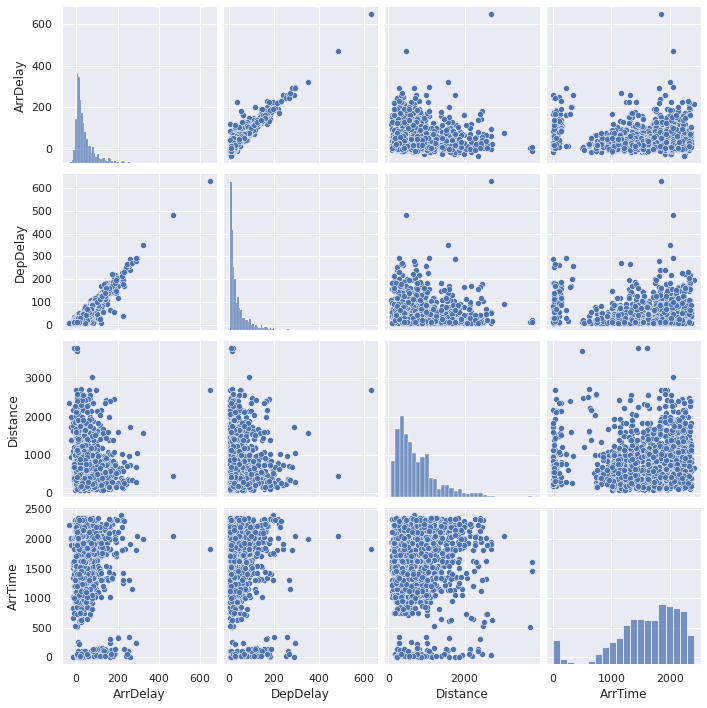

In [22]:
sns.pairplot(X_train[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/train_pairplot.png")

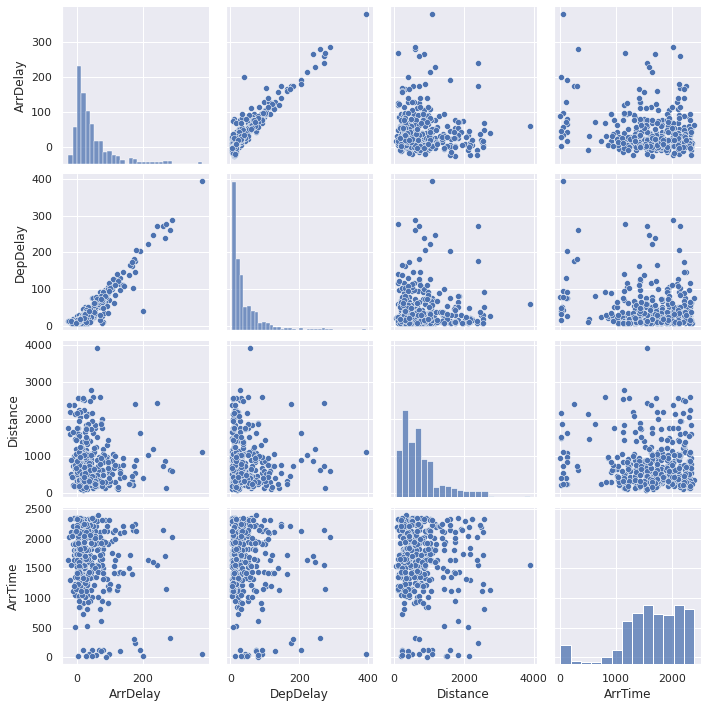

In [23]:
sns.pairplot(X_test[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime']])
plt.savefig("../reports/figures/test_pairplot.png")

In [24]:
X_train.to_csv("../data/interim/X_train.csv")
X_test.to_csv("../data/interim/X_test.csv")

- Scale Train and Test Data

In [25]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# fit on training data column
scale = StandardScaler().fit(X_train_stand)
    
# transform the training & Test data column
X_train_stand = scale.transform(X_train_stand)
    
X_test_stand = scale.transform(X_test_stand)

In [26]:
X_train_stand

array([[ 0.78058808, -0.23054657, -0.56101751, ..., -0.49211913,
        -0.25561104, -0.19367078],
       [ 0.09178675, -1.15851376, -0.56101751, ..., -0.49211913,
        -0.25561104, -0.19367078],
       [ 1.00413046,  1.59996405,  0.43273538, ..., -0.49211913,
        -0.25561104, -0.19367078],
       ...,
       [-0.36075026, -0.48478416, -0.16351635, ...,  2.03202831,
        -0.25561104, -0.19367078],
       [-0.89507108,  0.0146111 ,  0.03523423, ...,  2.03202831,
        -0.25561104, -0.19367078],
       [ 0.54977602, -0.61371893, -0.56101751, ..., -0.49211913,
        -0.25561104, -0.19367078]])

In [27]:
X_test_stand

array([[-0.81692212, -0.44664852, -0.56101751, ..., -0.49211913,
        -0.25561104, -0.19367078],
       [-2.81971647, -0.41032887,  1.02898712, ..., -0.49211913,
        -0.25561104, -0.19367078],
       [ 0.63155982,  1.79972215,  1.2277377 , ..., -0.49211913,
        -0.25561104, -0.19367078],
       ...,
       [ 0.42073936,  0.38688756, -0.75976809, ...,  2.03202831,
        -0.25561104, -0.19367078],
       [-0.32621933, -0.48478416,  0.43273538, ..., -0.49211913,
         3.91219416, -0.19367078],
       [ 0.22809308,  0.03458691, -0.16351635, ..., -0.49211913,
        -0.25561104, -0.19367078]])

In [28]:
X_train_stand = pd.DataFrame(X_train_stand, columns = X_train.columns)
X_test_stand = pd.DataFrame(X_test_stand, columns = X_test.columns)

In [29]:
X_train_stand.describe().round(3)

,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,ArrDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000
mean,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.912,-1.228,-1.157,-1.079,-1.528,-0.724,-0.559,-1.471,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
25%,-0.528,-0.726,-0.561,-0.503,-1.033,-0.603,-0.559,-0.609,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
50%,0.192,-0.272,-0.164,-0.286,-0.045,-0.380,0.011,-0.341,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
75%,0.772,0.423,0.234,0.218,0.943,0.165,0.011,0.233,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
max,1.448,5.503,13.153,13.986,1.437,11.908,20.938,11.608,6.222,3.198,5.781,6.142,4.314,3.957,5.025,8.145,5.653,39.345,3.599,4.285,6.778,3.727,3.482,4.125,2.032,3.912,5.163


In [30]:
X_train_stand.describe().round(3)

,ArrTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay,ArrDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000,1549.000
mean,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.912,-1.228,-1.157,-1.079,-1.528,-0.724,-0.559,-1.471,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
25%,-0.528,-0.726,-0.561,-0.503,-1.033,-0.603,-0.559,-0.609,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
50%,0.192,-0.272,-0.164,-0.286,-0.045,-0.380,0.011,-0.341,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
75%,0.772,0.423,0.234,0.218,0.943,0.165,0.011,0.233,-0.161,-0.313,-0.173,-0.163,-0.232,-0.253,-0.199,-0.123,-0.177,-0.025,-0.278,-0.233,-0.148,-0.268,-0.287,-0.242,-0.492,-0.256,-0.194
max,1.448,5.503,13.153,13.986,1.437,11.908,20.938,11.608,6.222,3.198,5.781,6.142,4.314,3.957,5.025,8.145,5.653,39.345,3.599,4.285,6.778,3.727,3.482,4.125,2.032,3.912,5.163


In [32]:
X_train_stand.to_csv("../data/interim/X_train_stand.csv")
X_test_stand.to_csv("../data/interim/X_test_stand.csv")